<a href="https://colab.research.google.com/github/birkneh/EFA/blob/main/m8l2_identifying_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histogram Example Python Code

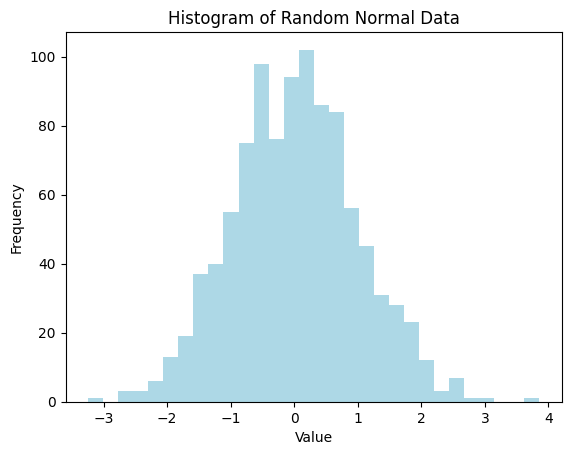

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
data = np.random.randn(1000)

plt.hist(data, bins=30, color="lightblue")
plt.title("Histogram of Random Normal Data")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show()


# Stem-and-Leaf Plots Example Python Code

In [ ]:
import numpy as np

np.random.seed(42)
data = np.random.randn(100)

# Round the data to two decimal places
rounded_data = np.round(data, 2)

# Sort the rounded data
sorted_data = np.sort(rounded_data)

# Create a dictionary to store stems and leaves
stem_and_leaves = {}

# Extract stems and leaves
for value in sorted_data:
    stem = int(value)
    leaf = int((value - stem) * 10)

    if stem not in stem_and_leaves:
        stem_and_leaves[stem] = []

    stem_and_leaves[stem].append(abs(leaf))

# Display the stem-and-leaf plot
for stem, leaves in sorted(stem_and_leaves.items()):
    stem_string = str(stem).rjust(3)
    leaves_string = " ".join(str(leaf) for leaf in leaves)
    print(stem_string + " | " + leaves_string)


 -2 | 6
 -1 | 9 9 9 7 7 4 4 4 4 3 2 1 1 1 0 0
  0 | 9 8 8 7 7 6 6 6 6 5 5 5 5 5 4 4 4 4 4 3 3 3 3 3 3 2 2 2 2 2 2 1 1 1 0 0 0 0 0 0 0 1 1 1 2 2 2 2 3 3 3 3 3 3 3 3 3 3 5 5 5 6 6 7 7 8 8 8 9 9 9 9
  1 | 0 0 0 3 4 4 5 5 5 5 8


# Discrete Distributions Example Python Code

<Figure size 1000x800 with 0 Axes>

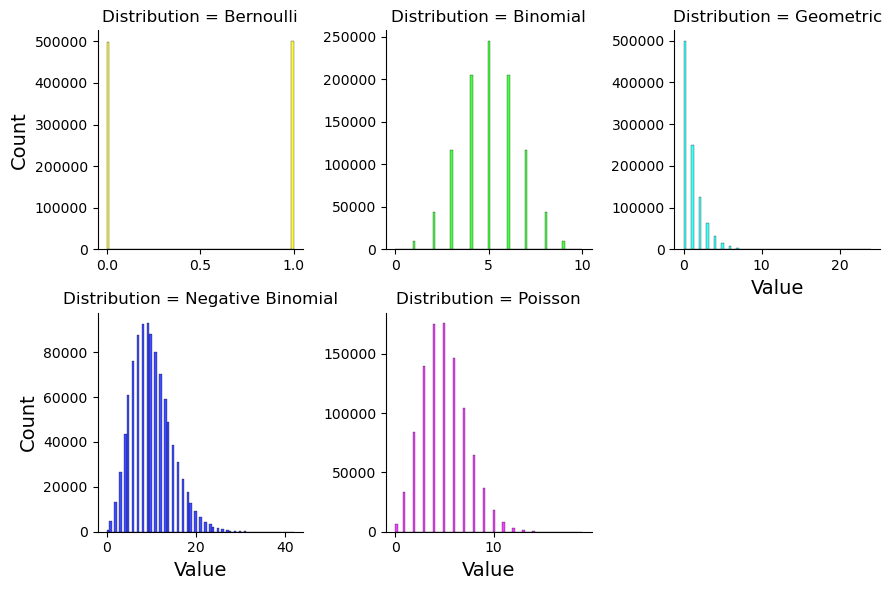

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set parameters
p = 0.5
n = 10
lambda_ = 5
n_sim = int(1e6)

# Generate random numbers
bern = np.random.binomial(1, p, n_sim)
binom = np.random.binomial(n, p, n_sim)
geom = np.random.geometric(p, n_sim) - 1  # Subtract 1 to match R's 0-based geometric
neg_binom = np.random.negative_binomial(n, p, n_sim)
pois = np.random.poisson(lambda_, n_sim)

# Combine data
data = pd.DataFrame({
    'value': np.concatenate([bern, binom, geom, neg_binom, pois]),
    'Distribution': ['Bernoulli']*n_sim + ['Binomial']*n_sim + ['Geometric']*n_sim + ['Negative Binomial']*n_sim + ['Poisson']*n_sim
})

# Plot
plt.figure(figsize=(10, 8))
# Define color palette
palette = sns.color_palette("hsv", 5)

# Plot
g = sns.FacetGrid(data, col="Distribution", col_wrap=3, sharex=False, sharey=False)

# Loop through axes to plot with different colors
for ax, title in zip(g.axes.flat, g.col_names):
    distribution = title
    color = palette[g.col_names.index(distribution)]
    sns.histplot(data[data['Distribution'] == distribution], x="value", bins=75, color=color, ax=ax, edgecolor='black')

g.set_titles(size=12)
g.set_axis_labels('Value', 'Count', size=14)
plt.tight_layout()
plt.show()


# Continuous Distributions Example Python Code

<Figure size 1400x1400 with 0 Axes>

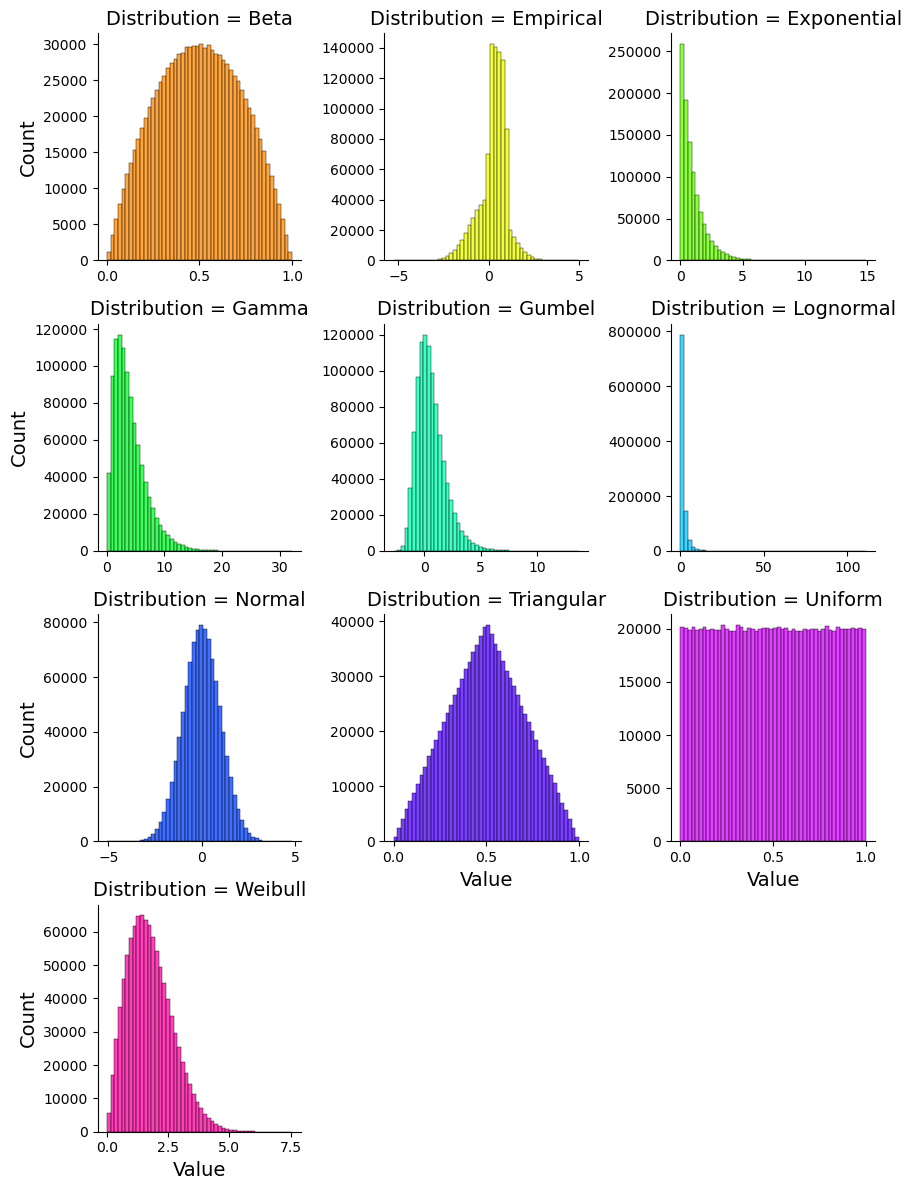

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import triang, gumbel_r

# Set parameters
n_sim = int(1e6)  # Number of simulations

min_uniform = 0
max_uniform = 1

c_triangular = 0.5

lambda_exponential = 1

mean_normal = 0
sd_normal = 1

shape1_beta = 2
shape2_beta = 2

shape_gamma = 2
scale_gamma = 2

shape_weibull = 2
scale_weibull = 2

mu_lognormal = 0
sigma_lognormal = 1

location_gumbel = 0
scale_gumbel = 1

# Generate random numbers
uniform = np.random.uniform(min_uniform, max_uniform, n_sim)
triangular = triang.rvs(c_triangular, size=n_sim)
exponential = np.random.exponential(1/lambda_exponential, n_sim)
normal = np.random.normal(mean_normal, sd_normal, n_sim)
beta = np.random.beta(shape1_beta, shape2_beta, n_sim)
gamma = np.random.gamma(shape_gamma, scale_gamma, n_sim)
weibull = np.random.weibull(shape_weibull, n_sim) * scale_weibull
gumbel = gumbel_r.rvs(location_gumbel, scale_gumbel, size=n_sim)
lognormal = np.random.lognormal(mu_lognormal, sigma_lognormal, n_sim)
empirical = np.concatenate([np.random.normal(size=n_sim//2), np.random.uniform(size=n_sim//2)])

# Combine data
data = pd.DataFrame({
    'value': np.concatenate([uniform, triangular, exponential, normal, beta,
                             gamma, weibull, gumbel, lognormal, empirical]),
    'Distribution': ['Uniform']*n_sim + ['Triangular']*n_sim + ['Exponential']*n_sim +
                    ['Normal']*n_sim + ['Beta']*n_sim + ['Gamma']*n_sim + ['Weibull']*n_sim +
                    ['Gumbel']*n_sim + ['Lognormal']*n_sim + ['Empirical']*n_sim
})

# Sort distributions alphabetically
data['Distribution'] = pd.Categorical(data['Distribution'], categories=
    ['Beta', 'Empirical', 'Exponential', 'Gamma', 'Gumbel', 'Lognormal', 'Normal', 'Triangular', 'Uniform', 'Weibull'],
    ordered=True)
data = data.sort_values('Distribution')

plt.figure(figsize=(14, 14))
# Define color palette
palette = sns.color_palette("hsv", len(data['Distribution'].unique()))

# Plot
g = sns.FacetGrid(data, col="Distribution", col_wrap=3, sharex=False, sharey=False)

# Loop through axes to plot with different colors
for ax, title in zip(g.axes.flat, g.col_names):
    distribution = title
    color = palette[g.col_names.index(distribution)]
    sns.histplot(data[data['Distribution'] == distribution], x="value", bins=50, color=color, ax=ax, edgecolor='black')

g.set_titles(size=14)
g.set_axis_labels('Value', 'Count', size=14)
plt.tight_layout()
plt.show()


# Game Plan Example Python Code

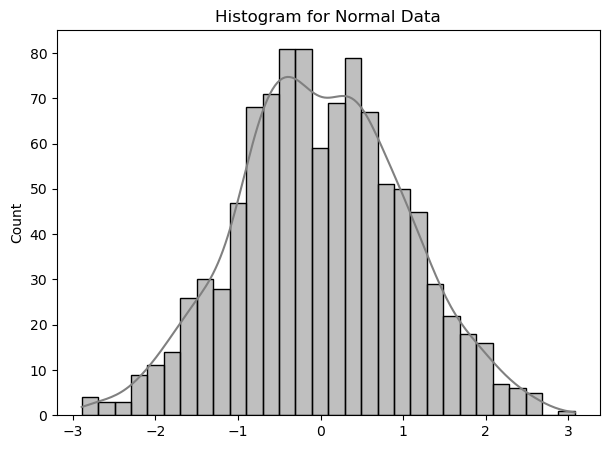

<Figure size 700x500 with 0 Axes>

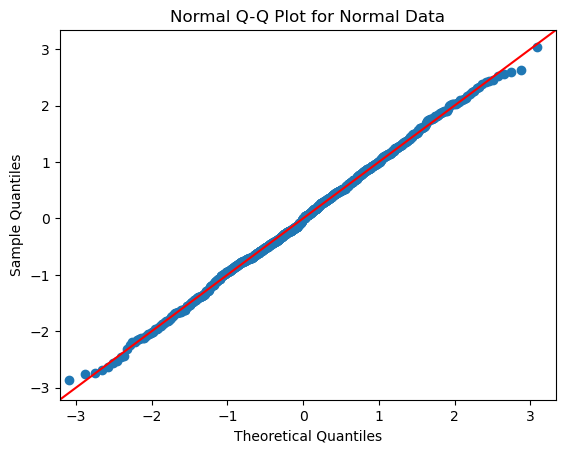

Shapiro-Wilk Test:
Test Statistic: 0.9984084963798523
p-value: 0.49629446864128113


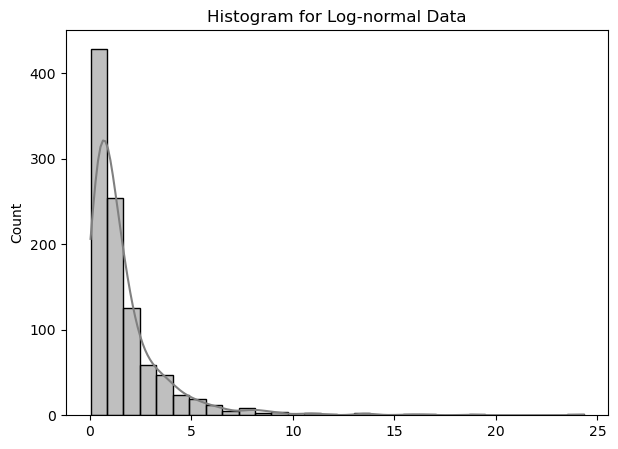

<Figure size 700x500 with 0 Axes>

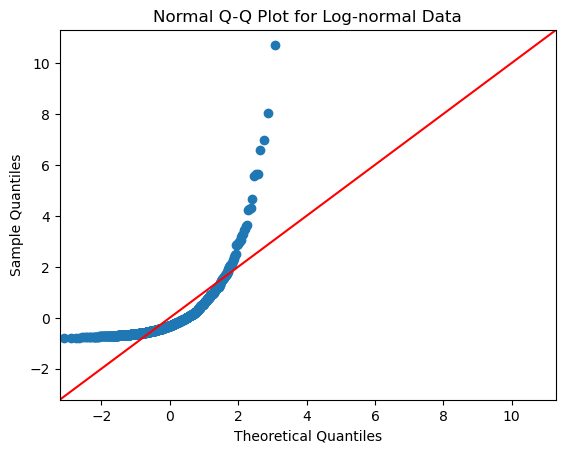

Shapiro-Wilk Test:
Test Statistic: 0.6345316171646118
p-value: 1.1382747425710489e-41


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Set parameters
mu = 0
sigma = 1
n = 1000

# Generate random numbers from a normal and log-normal distribution
data_normal = np.random.normal(mu, sigma, n)
data_lognormal = np.random.lognormal(mu, sigma, n)

# Function to plot histogram, QQ-plot and perform Shapiro-Wilk test
def plot_and_test(data, title):
    # Create a histogram
    plt.figure(figsize=(7,5))
    sns.histplot(data, bins=30, kde=True, color='gray', edgecolor='black')
    plt.title(f'Histogram for {title}')
    plt.show()

    # Create a normal probability plot (QQ-plot)
    plt.figure(figsize=(7,5))
    sm.qqplot(data, line ='45', fit=True)
    plt.title(f'Normal Q-Q Plot for {title}')
    plt.show()

    # Perform a Shapiro-Wilk normality test
    shapiro_test = stats.shapiro(data)

    # Print the results
    print('Shapiro-Wilk Test:')
    print('Test Statistic:', shapiro_test[0])
    print('p-value:', shapiro_test[1])

# Use the function for normal and log-normal data
plot_and_test(data_normal, "Normal Data")
plot_and_test(data_lognormal, "Log-normal Data")
